<a href="https://colab.research.google.com/github/Viswonathan06/Research-Internship-Dec-2020/blob/main/AL_DDoS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting AL-DDoS attack given the parameters.

In [6]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import keras


In [45]:
df2 = pd.read_csv("/content/drive/MyDrive/test_mosaic.csv")
df =  pd.read_csv("/content/drive/MyDrive/train_mosaic.csv")


fl_dur	Flow duration
tot_fw_pk	Total packets in the forward direction
tot_bw_pk	Total packets in the backward direction
tot_l_fw_pkt	Total size of packet in forward direction
fw_pkt_l_max	Maximum size of packet in forward direction
fw_pkt_l_min	Minimum size of packet in forward direction
fw_pkt_l_avg	Average size of packet in forward direction
fw_pkt_l_std	Standard deviation size of packet in forward direction
Bw_pkt_l_max	Maximum size of packet in backward direction
Bw_pkt_l_min	Minimum size of packet in backward direction
Bw_pkt_l_avg	Mean size of packet in backward direction
Bw_pkt_l_std	Standard deviation size of packet in backward direction
fl_byt_s	flow byte rate that is number of packets transferred per second
fl_pkt_s	flow packets rate that is number of packets transferred per second
fl_iat_avg	Average time between two flows
fl_iat_std	Standard deviation time two flows
fl_iat_max	Maximum time between two flows
fl_iat_min	Minimum time between two flows
fw_iat_tot	Total time between two packets sent in the forward direction
fw_iat_avg	Mean time between two packets sent in the forward direction
fw_iat_std	Standard deviation time between two packets sent in the forward direction
fw_iat_max	Maximum time between two packets sent in the forward direction
fw_iat_min	Minimum time between two packets sent in the forward direction
bw_iat_tot	Total time between two packets sent in the backward direction
bw_iat_avg	Mean time between two packets sent in the backward direction
bw_iat_std	Standard deviation time between two packets sent in the backward direction
bw_iat_max	Maximum time between two packets sent in the backward direction
bw_iat_min	Minimum time between two packets sent in the backward direction
fw_psh_flag	Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
bw_psh_flag	Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
fw_urg_flag	Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
bw_urg_flag	Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
fw_hdr_len	Total bytes used for headers in the forward direction
bw_hdr_len	Total bytes used for headers in the forward direction
fw_pkt_s	Number of forward packets per second
bw_pkt_s	Number of backward packets per second
pkt_len_min	Minimum length of a flow
pkt_len_max	Maximum length of a flow
pkt_len_avg	Mean length of a flow
pkt_len_std	Standard deviation length of a flow
pkt_len_va	Minimum inter-arrival time of packet
fin_cnt	Number of packets with FIN
syn_cnt	Number of packets with SYN
rst_cnt	Number of packets with RST
pst_cnt	Number of packets with PUSH
ack_cnt	Number of packets with ACK
urg_cnt	Number of packets with URG
cwe_cnt	Number of packets with CWE
ece_cnt	Number of packets with ECE
down_up_ratio	Download and upload ratio
pkt_size_avg	Average size of packet
fw_seg_avg	Average size observed in the forward direction
bw_seg_avg	Average size observed in the backward direction
fw_byt_blk_avg	Average number of bytes bulk rate in the forward direction
fw_pkt_blk_avg	Average number of packets bulk rate in the forward direction
fw_blk_rate_avg	Average number of bulk rate in the forward direction
bw_byt_blk_avg	Average number of bytes bulk rate in the backward direction
bw_pkt_blk_avg	Average number of packets bulk rate in the backward direction
bw_blk_rate_avg	Average number of bulk rate in the backward direction
subfl_fw_pk	The average number of packets in a sub flow in the forward direction
subfl_fw_byt	The average number of bytes in a sub flow in the forward direction
subfl_bw_pkt	The average number of packets in a sub flow in the backward direction
subfl_bw_byt	The average number of bytes in a sub flow in the backward direction
fw_win_byt	Number of bytes sent in initial window in the forward direction
bw_win_byt	# of bytes sent in initial window in the backward direction
Fw_act_pkt	# of packets with at least 1 byte of TCP data payload in the forward direction
fw_seg_min	Minimum segment size observed in the forward direction


In [8]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,0,0,0.0000,0.000000,9.578052,0.207574,5.058440e+06,1.800000e+07,79000000.0,2.0,101000000.0,5.323696e+06,1.840000e+07,79000000.0,2.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,728.0,40.0,0.197689,0.009884,0.0,353.0,44.045455,114.164659,13033.569260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.142857,48.450000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,969.0,1.0,0.0,-1.0,29200.0,3.0,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,DoS Hulk
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,2.000000,176182.000000,5.800000e+01,0.000000e+00,58.0,58.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,17241.379310,17241.379310,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,33304.0,0.0,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,122,122,122.0000,0.000000,36909.000000,127126.000000,6.229200e+03,1.340626e+04,30200.0,1.0,30204.0,1.006800e+04,1.743482e+04,30200.0,1.0,1.0,1.0000,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,80.0,40.0,128.427406,64.213703,37.0,122.0,61.285714,41.475753,1720.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.500000,37.000000,122.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,148.0,2.0,244.0,-1.0,-1.0,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,377,0,97.2500,186.521446,158570.000000,157963.000000,4.245067e+04,6.313298e+04,123916.0,4.0,130486.0,6.524300e+04,8.303272e+04,123956.0,6530.0,130788.0,43596.0000,7.520757e+04,130438.0,4.0,0.0,0.0,0.0,0.0,72.0,88.0,11.778378,15.704504,0.0,423.0,102.250000,184.206988,33932.214290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,116.857143,143.000000,97.2500,0.0,0.0,0.0,0.0,0.0,0.0,3.0,429.0,4.0,389.0,8192.0,237.0,2.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,1793,0,981.4375,778.377798,79335.000000,133390.000000,4.419288e+05,2.120637e+06,11049290.0,2.0,882787.0,8.025336e+04,6.855032e+04,241684.0,182.0,11846006.0,789733.7333,2.839742e+06,11049530.0,50.0,0.0,0.0,0.0,0.0,252.0,332.0,1.005692,1.340923,0.0,1793.0,714.931035,764.389202,584290.852200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,740.464286,419.166667,981.4375,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5030.0,16.0,15703.0,8192.0,100.0,11.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Basic Dataset Information

In [9]:
df.shape

(809361, 78)

In [43]:
df.describe()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
count,809361.000000,8.093610e+05,809361.000000,809361.000000,8.093610e+05,8.093610e+05,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,809361.000000,809361.000000,809361.0,809361.0,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,809361.000000,809361.000000,809361.000000,809361.000000,8.093610e+05,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.0,809361.000000,809361.000000,809361.000000,809361.000000,809361.000000,809361.0,809361.0,809361.0,809361.0,809361.0,809361.0,809361.000000,8.093610e+05,809361.000000,8.093610e+05,809361.000000,809361.000000,809361.000000,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,8.093610e+05,809361.000000
mean,4904.991302,2.504842e+07,9.073800,5.318512,4.659948e+02,7.041397e+03,229.735331,9.306948,48.846569,81.858579,186.092251,23.286078,75.817995,60.051838,62788.332128,6.948956e+04,2.609902e+06,5.389375e+06,1.632404e+07,1.748682e+05,2.383054e+07,3.188009e+06,5.044050e+06,1.543856e+07,7.303784e+05,4.187887e+06,8.369004e+05,3.720925e+05,1.552540e+06,5.749027e+05,0.029365,0.002154,0.0,0.0,-4.292409e+03,-1.629103e+03,2.871470e+04,3.871917e+03,9.022530,347.110516,67.164720,111.710340,3.938336e+04,0.014378,0.460499,0.098354,0.115811,0.152995,0.054854,0.0,0.000065,0.312686,75.978992,48.846569,75.817995,0.0,0.0,0.0,0.0,0.0,0.0,9.073800,4.659948e+02,5.318512,7.041397e+03,4159.054102,13986.145736,4.327992,-1.749905e+03,3.146043e+05,1.738503e+05,4.680256e+05,1.929457e+05,1.373910e+07,2.446688e+06,1.585056e+07,1.179622e+07,0.700985
std,15382.903368,3.554362e+07,542.751484,719.218470,3.782515e+03,1.623593e+06,314.052604,26.341044,65.069803,107.997283,567.513531,57.371961,204.611014,197.609206,96870.785494,9.631605e+04,5.006209e+06,8.836513e+06,2.619223e+07,2.989199e+06,3.497740e+07,7.918618e+06,8.356581e+06,2.553473e+07,7.067441e+06,1.928286e+07,6.662558e+06,2.474623e+06,8.921572e+06,6.458062e+06,0.168828,0.046356,0.0,0.0,1.609653e+06,4.474043e+05,1.595798e+05,3.445568e+04,19.615885,579.619319,114.148221,164.024971,1.419277e+05,0.119043,0.498438,0.297793,0.319998,0.359983,0.227696,0.0,0.008092,0.489212,119.739872,65.069803,204.611014,0.0,0.0,0.0,0.0,0.0,0.0,542.751484,3.782515e+03,719.218470,1.623593e+06,13115.812475,14936.451934,522.596651,3.844457e+05,9.096841e+05,6.192143e+05,1.300849e+06,7.747840e+05,2.433428e+07,7.024856e+06,2.627564e+07,2.363940e+07,0.726235
mi

In [11]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN

In [ ]:
for i in range (0,df.columns.size):
        print(df.columns[i], df[df.columns[i]].dtype)

* HULK or "Http Unbearable Load King" is a Python script developed 
by Barry Shteiman. HULK was designed to repeatedly generate numerous uniquely crafted HTTP requests which will create load on a webserver, thereby exhausting webserver resources. 

* Slowloris is an application layer DDoS attack which uses partial HTTP requests to open connections between a single computer and a targeted Web server, then keeping those connections open for as long as possible, thus overwhelming and slowing down the target. This type of DDoS attack requires minimal bandwidth to launch and only impacts the target web server, leaving other services and ports unaffected. 




---



* Destination_Port int64 -
* Flow_Duration int64 -  Flow duration
* Total_Fwd_Packets int64 - Total packets in the forward direction
* Total_Backward_Packets int64 - Total packets in the backward direction
* Total_Length_of_Fwd_Packets int64 -Total size of packet in forward direction
* Total_Length_of_Bwd_Packets int64  - Total size of packet in backward direction


---


Forward direction packet information
* Fwd_Packet_Length_Max int64
* Fwd_Packet_Length_Min int64
* Fwd_Packet_Length_Mean float64
* Fwd_Packet_Length_Std float64

Backward direction packet information
* Bwd_Packet_Length_Max int64
* Bwd_Packet_Length_Min int64
* Bwd_Packet_Length_Mean float64
* Bwd_Packet_Length_Std float64


* Flow_Bytes_Sec float64 - flow byte rate that is number of packets transferred per second
* Flow_Packets_Sec float64 - flow packets rate that is number of packets transferred per second

Statistical data between two flows ( IAT - Inter Arrival Time )
* Flow_IAT_Mean float64 
* Flow_IAT_Std float64
* Flow_IAT_Max float64
* Flow_IAT_Min float64
* Fwd_IAT_Total float64
* Fwd_IAT_Mean float64
* Fwd_IAT_Std float64
* Fwd_IAT_Max float64
* Fwd_IAT_Min float64
* Bwd_IAT_Total float64
* Bwd_IAT_Mean float64
* Bwd_IAT_Std float64
* Bwd_IAT_Max float64
* Bwd_IAT_Min float64
* Fwd_PSH_Flags float64
* Bwd_PSH_Flags float64
* Fwd_URG_Flags float64
* Bwd_URG_Flags float64
* Fwd_Header_Length float64
* Bwd_Header_Length float64
* Fwd_Packets_Sec float64
* Bwd_Packets_Sec float64
* Min_Packet_Length float64
* Max_Packet_Length float64
* Packet_Length_Mean float64
* Packet_Length_Std float64
* Packet_Length_Variance float64


---


 Number of packets with FIN, SYN, RST, PSH, ACK, URG, CWE and ECE.
* FIN_Flag_Count float64 
* SYN_Flag_Count float64
* RST_Flag_Count float64
* PSH_Flag_Count float64
* ACK_Flag_Count float64
* URG_Flag_Count float64
* CWE_Flag_Count float64
* ECE_Flag_Count float64


* Down_Up_Ratio float64 - Download and upload ratio


* Average_Packet_Size float64
* Avg_Fwd_Segment_Size float64
* Avg_Bwd_Segment_Size float64
* Fwd_Avg_Bytes_Bulk float64
* Fwd_Avg_Packets_Bulk float64
* Fwd_Avg_Bulk_Rate float64
* Bwd_Avg_Bytes_Bulk float64
* Bwd_Avg_Packets_Bulk float64
* Bwd_Avg_Bulk_Rate float64
* Subflow_Fwd_Packets float64
* Subflow_Fwd_Bytes float64
* Subflow_Bwd_Packets float64
* Subflow_Bwd_Bytes float64
* Init_Win_bytes_forward float64
* Init_Win_bytes_backward float64
* act_data_pkt_fwd float64
* min_seg_size_forward float64


* Active_Mean float64 - Mean time a flow was active before becoming idle
* Active_Std float64 - Standard deviation time a flow was active before becoming idle
* Active_Max float64 - Maximum time a flow was active before becoming idle
* Active_Min float64 - Minimum time a flow was active before becoming idle
* Idle_Mean float64 - Mean time a flow was idle before becoming active
* Idle_Std float64 - Standard deviation time a flow was idle before becoming active
* Idle_Max float64 - Maximum time a flow was idle before becoming active
* Idle_Min float64 - Minimum time a flow was idle before becoming active
* Label object




fl_dur	
tot_fw_pk	Total packets in the forward direction
tot_bw_pk	Total packets in the backward direction
tot_l_fw_pkt	Total size of packet in forward direction
fw_pkt_l_max	Maximum size of packet in forward direction
fw_pkt_l_min	Minimum size of packet in forward direction
fw_pkt_l_avg	Average size of packet in forward direction
fw_pkt_l_std	Standard deviation size of packet in forward direction
Bw_pkt_l_max	Maximum size of packet in backward direction
Bw_pkt_l_min	Minimum size of packet in backward direction
Bw_pkt_l_avg	Mean size of packet in backward direction
Bw_pkt_l_std	Standard deviation size of packet in backward direction
fl_byt_s	flow byte rate that is number of packets transferred per second
fl_pkt_s	flow packets rate that is number of packets transferred per second
fl_iat_avg	Average time between two flows
fl_iat_std	Standard deviation time two flows
fl_iat_max	Maximum time between two flows
fl_iat_min	Minimum time between two flows
fw_iat_tot	Total time between two packets sent in the forward direction
fw_iat_avg	Mean time between two packets sent in the forward direction
fw_iat_std	Standard deviation time between two packets sent in the forward direction
fw_iat_max	Maximum time between two packets sent in the forward direction
fw_iat_min	Minimum time between two packets sent in the forward direction
bw_iat_tot	Total time between two packets sent in the backward direction
bw_iat_avg	Mean time between two packets sent in the backward direction
bw_iat_std	Standard deviation time between two packets sent in the backward direction
bw_iat_max	Maximum time between two packets sent in the backward direction
bw_iat_min	Minimum time between two packets sent in the backward direction
fw_psh_flag	Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
bw_psh_flag	Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
fw_urg_flag	Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
bw_urg_flag	Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
fw_hdr_len	Total bytes used for headers in the forward direction
bw_hdr_len	Total bytes used for headers in the forward direction
fw_pkt_s	Number of forward packets per second
bw_pkt_s	Number of backward packets per second
pkt_len_min	Minimum length of a flow
pkt_len_max	Maximum length of a flow
pkt_len_avg	Mean length of a flow
pkt_len_std	Standard deviation length of a flow
pkt_len_va	Minimum inter-arrival time of packet
fin_cnt	Number of packets with FIN
syn_cnt	Number of packets with SYN
rst_cnt	Number of packets with RST
pst_cnt	Number of packets with PUSH
ack_cnt	Number of packets with ACK
urg_cnt	Number of packets with URG
cwe_cnt	Number of packets with CWE
ece_cnt	Number of packets with ECE
down_up_ratio	Download and upload ratio
pkt_size_avg	Average size of packet
fw_seg_avg	Average size observed in the forward direction
bw_seg_avg	Average size observed in the backward direction
fw_byt_blk_avg	Average number of bytes bulk rate in the forward direction
fw_pkt_blk_avg	Average number of packets bulk rate in the forward direction
fw_blk_rate_avg	Average number of bulk rate in the forward direction
bw_byt_blk_avg	Average number of bytes bulk rate in the backward direction
bw_pkt_blk_avg	Average number of packets bulk rate in the backward direction
bw_blk_rate_avg	Average number of bulk rate in the backward direction
subfl_fw_pk	The average number of packets in a sub flow in the forward direction
subfl_fw_byt	The average number of bytes in a sub flow in the forward direction
subfl_bw_pkt	The average number of packets in a sub flow in the backward direction
subfl_bw_byt	The average number of bytes in a sub flow in the backward direction
fw_win_byt	Number of bytes sent in initial window in the forward direction
bw_win_byt	# of bytes sent in initial window in the backward direction
Fw_act_pkt	# of packets with at least 1 byte of TCP data payload in the forward direction
fw_seg_min	Minimum segment size observed in the forward direction









## Let's see if we have a balanced dataset with labels
* Benign
* Dos Hulk
* Dos slowloris

In [46]:
df['Label'].value_counts()

BENIGN           370623
DoS Hulk         310126
DoS slowloris    128612
Name: Label, dtype: int64

As we see, we do have a pretty balanced dataset with equal number of BENIGN and Dos Hulk labels and about half the number of DoS slowloris labels

# Graphical Analysis

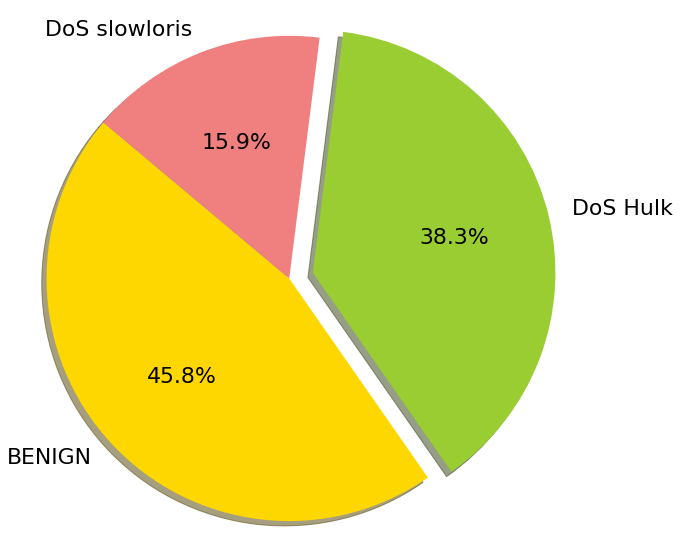

In [47]:
labels = 'BENIGN', 'DoS Hulk', 'DoS slowloris'
sizes = [len(df[df['Label']=='BENIGN']), len(df[df['Label']=='DoS Hulk']), 
         len(df[df['Label']=='DoS slowloris'])]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0.1, 0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

This confirms what we found out from the data analysis that BENIGN and DoS Hulk have almost equal partition in the data while remaining being DoS slowloris.

Text(0, 0.5, 'Flow_Packets_Sec')

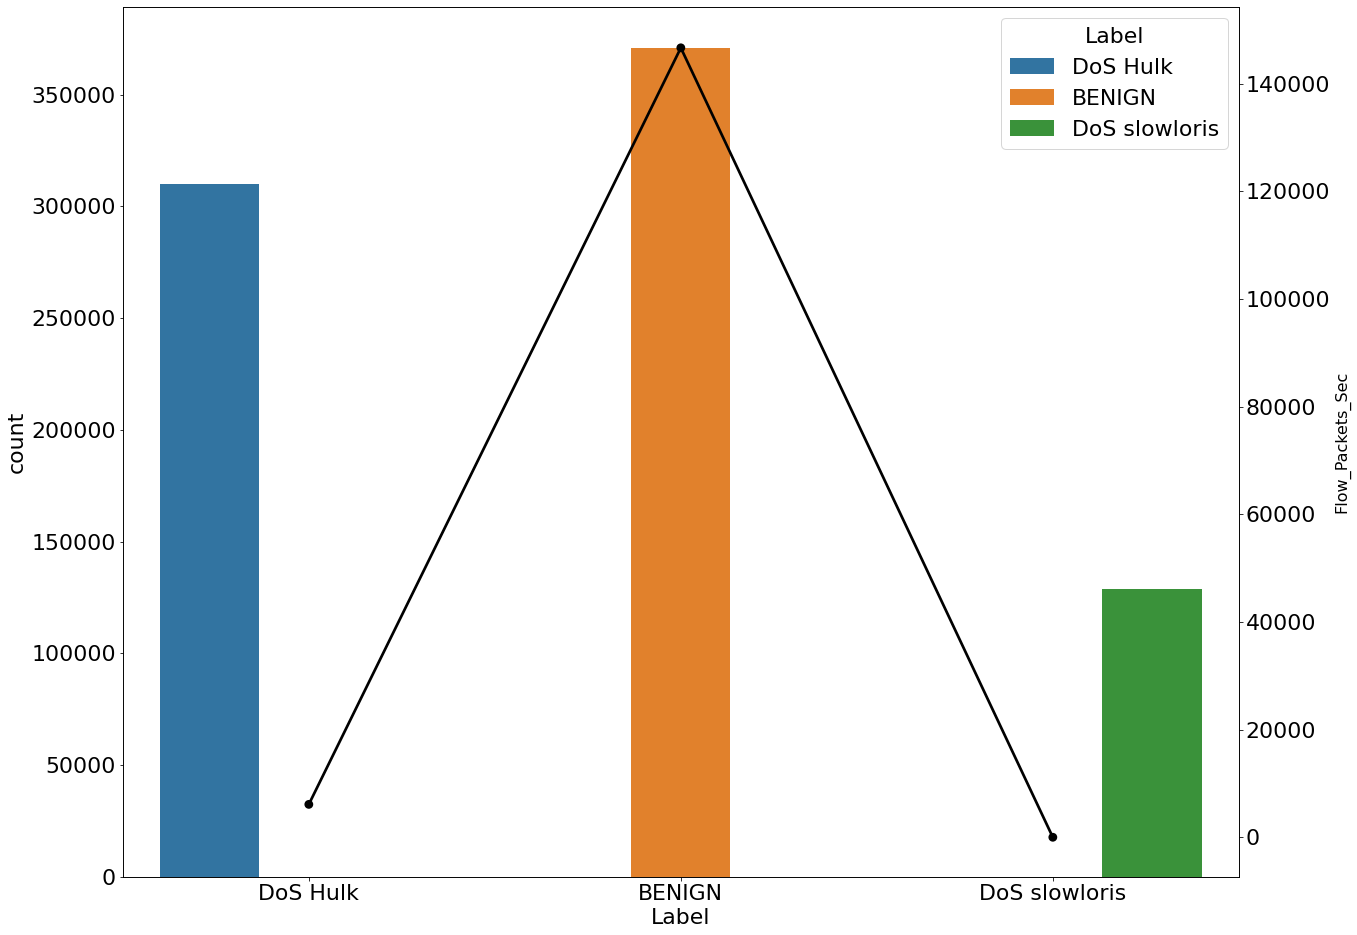

In [50]:

plt.figure(figsize=(20,16))
g1 = sns.countplot(x='Label', hue='Label', data=df)
gt = g1.twinx()
gt = sns.pointplot(y='Flow_Packets_Sec', x='Label', data=df, color='black', legend=False)
gt.set_ylabel("Flow_Packets_Sec", fontsize=16)

Text(0, 0.5, 'Flow_Packets_Sec')

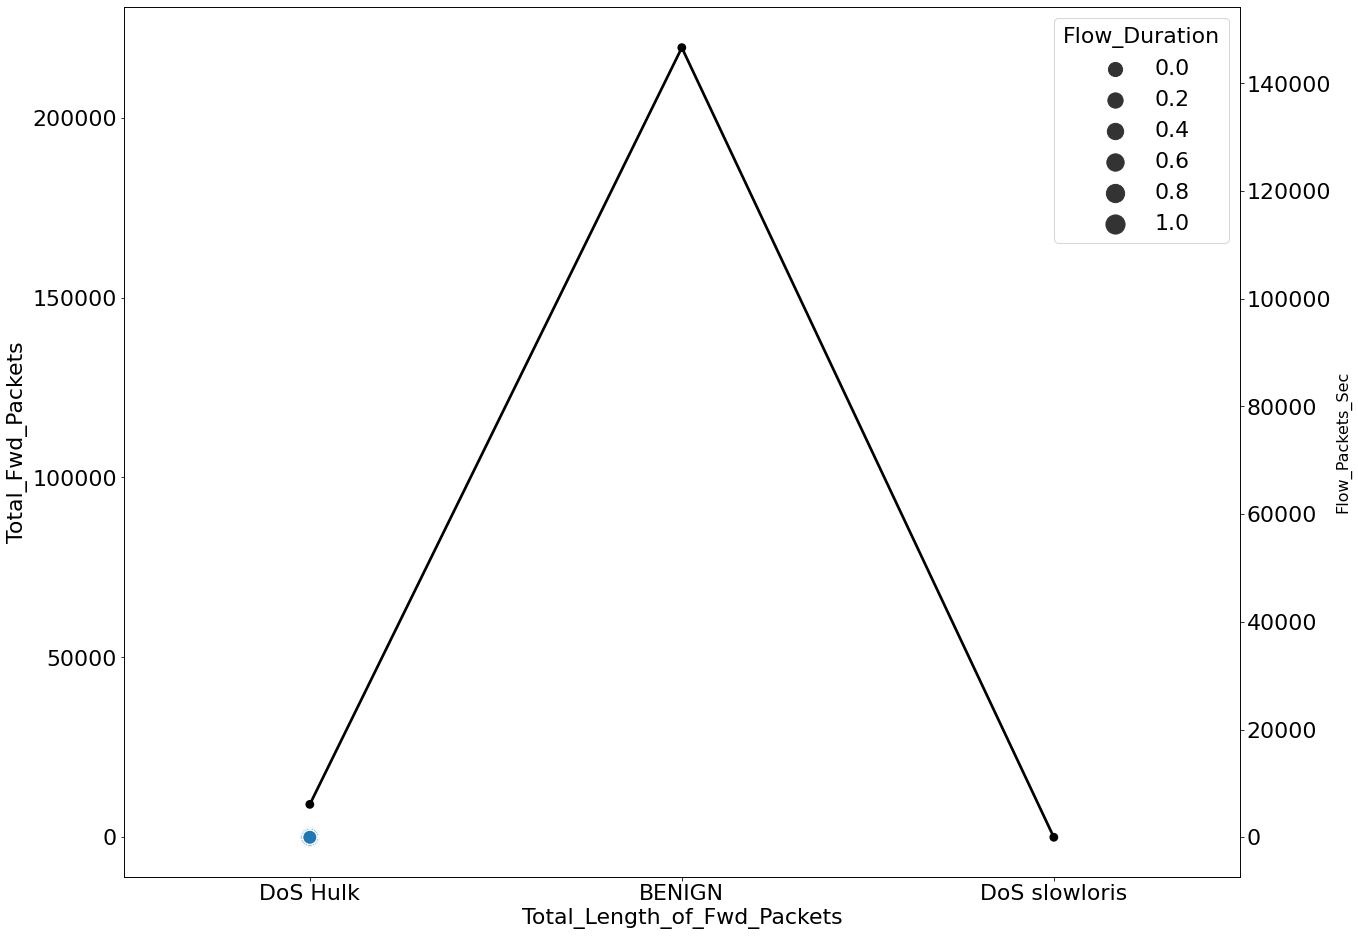

In [51]:
plt.figure(figsize=(20,16))
g1 = sns.scatterplot(y='Total_Fwd_Packets', x='Total_Length_of_Fwd_Packets',
                     sizes=(200, 400), size='Flow_Duration',data=df)

gt = g1.twinx()
t = sns.pointplot(y='Flow_Packets_Sec', x='Label', data=df, color='black', legend=False)
gt.set_ylabel("Flow_Packets_Sec", fontsize=16)

In the above plot, we notice that both total number of forward packets is less for both the DDoS attacks, while it's high for benign connections. 

Let's see if we get similar results for backward packets.

Text(0, 0.5, 'Flow_Packets_Sec')

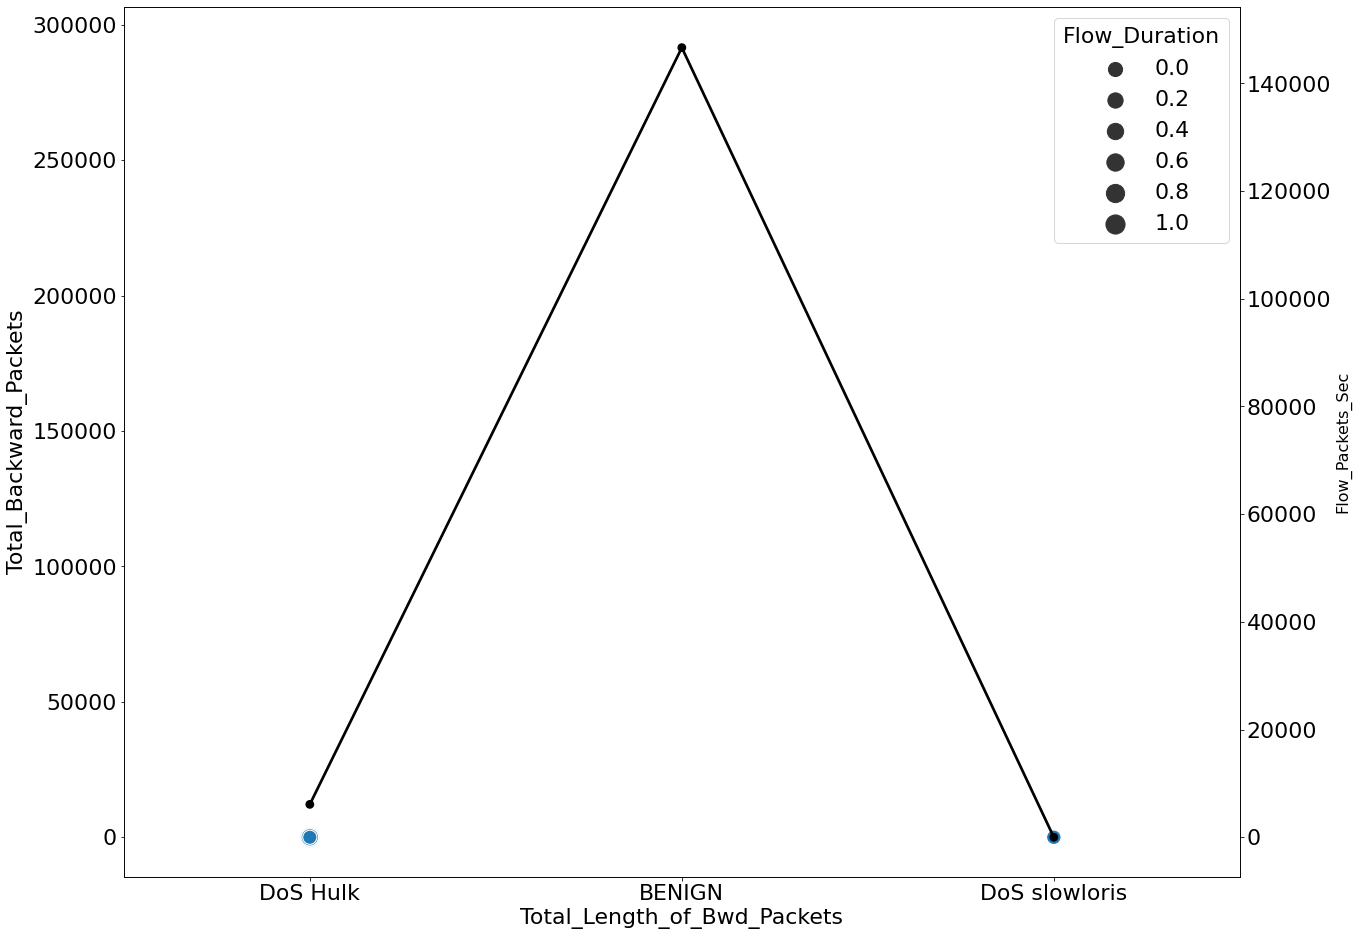

In [52]:
plt.figure(figsize=(20,16))
g1 = sns.scatterplot(y='Total_Backward_Packets', x='Total_Length_of_Bwd_Packets',
                     sizes=(200, 400), size='Flow_Duration',data=df)

gt = g1.twinx()
t = sns.pointplot(y='Flow_Packets_Sec', x='Label', data=df, color='black', legend=False)
gt.set_ylabel("Flow_Packets_Sec", fontsize=16)

# Modifying the data 

As Label column is the only one with categorical data in the form of string object, we encode it with 
* Benign = 0
* Dos Hulk = 1
* Dos slowloris = 2

In [14]:
cleanup_nums = {"Label":     {'BENIGN':0,
                              'DoS Hulk':1,  
                               'DoS slowloris':2}}
df= df.replace(cleanup_nums)
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,80,101168794,20,1,969,0,353,0,48.450000,119.083551,0,0,0.0000,0.000000,9.578052,0.207574,5.058440e+06,1.800000e+07,79000000.0,2.0,101000000.0,5.323696e+06,1.840000e+07,79000000.0,2.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,728.0,40.0,0.197689,0.009884,0.0,353.0,44.045455,114.164659,13033.569260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.142857,48.450000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,20.0,969.0,1.0,0.0,-1.0,29200.0,3.0,0.0,739228.5,743103.4661,1264682.0,213775.0,49700000.0,41400000.0,79000000.0,20500000.0,1
1,60711,58,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,2.000000,176182.000000,5.800000e+01,0.000000e+00,58.0,58.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,32.0,32.0,17241.379310,17241.379310,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,60.0,33304.0,0.0,32.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,53,31146,4,2,148,244,37,37,37.000000,0.000000,122,122,122.0000,0.000000,36909.000000,127126.000000,6.229200e+03,1.340626e+04,30200.0,1.0,30204.0,1.006800e+04,1.743482e+04,30200.0,1.0,1.0,1.0000,0.000000e+00,1.0,1.0,0.0,0.0,0.0,0.0,80.0,40.0,128.427406,64.213703,37.0,122.0,61.285714,41.475753,1720.238095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.500000,37.000000,122.0000,0.0,0.0,0.0,0.0,0.0,0.0,4.0,148.0,2.0,244.0,-1.0,-1.0,3.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,80,254704,3,4,429,389,423,0,143.000000,242.505670,377,0,97.2500,186.521446,158570.000000,157963.000000,4.245067e+04,6.313298e+04,123916.0,4.0,130486.0,6.524300e+04,8.303272e+04,123956.0,6530.0,130788.0,43596.0000,7.520757e+04,130438.0,4.0,0.0,0.0,0.0,0.0,72.0,88.0,11.778378,15.704504,0.0,423.0,102.250000,184.206988,33932.214290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,116.857143,143.000000,97.2500,0.0,0.0,0.0,0.0,0.0,0.0,3.0,429.0,4.0,389.0,8192.0,237.0,2.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,443,11932077,12,16,5030,15703,1525,0,419.166667,644.896586,1793,0,981.4375,778.377798,79335.000000,133390.000000,4.419288e+05,2.120637e+06,11049290.0,2.0,882787.0,8.025336e+04,6.855032e+04,241684.0,182.0,11846006.0,789733.7333,2.839742e+06,11049530.0,50.0,0.0,0.0,0.0,0.0,252.0,332.0,1.005692,1.340923,0.0,1793.0,714.931035,764.389202,584290.852200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,740.464286,419.166667,981.4375,0.0,0.0,0.0,0.0,0.0,0.0,12.0,5030.0,16.0,15703.0,8192.0,100.0,11.0,20.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
cleanup_nums = {"Label":     {'BENIGN':0,
                              'DoS Hulk':1,  
                               'DoS slowloris':2}}
df2= df2.replace(cleanup_nums)
df2.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,132,132,132.0,0.0,182064.000000,193413.000000,2.925000e+04,5.065816e+04,87745.0,2.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,3.0,3.000000,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,64.0,64.0,22.792023,22.792023,36.0,132.0,74.400000,52.581366,2764.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.000,36.000000,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,264.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,58,58,58.0,0.0,23032.000000,155666.000000,4.439000e+03,1.157438e+04,30687.0,3.0,30949.0,1.031633e+04,1.778528e+04,30853.0,48.0,338.0,112.666667,152.644467,287.0,3.0,0.0,0.0,0.0,0.0,128.0,104.0,128.729122,128.729122,30.0,58.0,42.444444,14.757296,217.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.750,30.000000,58.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,120.0,4.0,232.0,-1.0,-1.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,0,0,0.0,0.0,9.410259,0.218843,5.140666e+06,1.297677e+07,37178044.0,4.0,41124170.0,5.874881e+06,1.383587e+07,37178044.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,0.194527,0.024316,0.0,188.0,38.700000,73.870833,5456.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000,48.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,387.0,1.0,0.0,-1.0,29200.0,4.0,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0,2
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,127,127,127.0,0.0,70064.000000,127938.000000,5.804714e+03,1.151826e+04,30595.0,3.0,40438.0,1.347933e+04,2.330187e+04,40386.0,4.0,9990.0,3330.000000,5723.606119,9939.0,3.0,0.0,0.0,0.0,0.0,104.0,104.0,98.442153,98.442153,35.0,127.0,75.888889,48.488257,2351.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.375,35.000000,127.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,140.0,4.0,508.0,-1.0,-1.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,0,0,0.0,0.0,5.033312,0.190836,5.988672e+06,9.464271e+06,21351194.0,4.0,41919422.0,6.986570e+06,9.956012e+06,21351194.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,224.0,40.0,0.166982,0.023855,0.0,168.0,23.444444,54.726847,2995.027778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.375,30.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,211.0,1.0,0.0,-1.0,29200.0,4.0,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0,2


In [16]:
df2['Label'].dtype


dtype('int64')

## Separating the Label values from test and train datasets to form the input function

In [17]:

y_train = df['Label'] 
y_test = df2['Label']
x_train = df.drop('Label', axis = 1)
x_test = df2.drop('Label', axis = 1)

In [18]:
x_test.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,53,87750,2,2,72,264,36,36,36.000000,0.000000,132,132,132.0,0.0,182064.000000,193413.000000,2.925000e+04,5.065816e+04,87745.0,2.0,2.0,2.000000e+00,0.000000e+00,2.0,2.0,3.0,3.000000,0.000000,3.0,3.0,0.0,0.0,0.0,0.0,64.0,64.0,22.792023,22.792023,36.0,132.0,74.400000,52.581366,2764.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.000,36.000000,132.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,72.0,2.0,264.0,-1.0,-1.0,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,53,31073,4,4,120,232,30,30,30.000000,0.000000,58,58,58.0,0.0,23032.000000,155666.000000,4.439000e+03,1.157438e+04,30687.0,3.0,30949.0,1.031633e+04,1.778528e+04,30853.0,48.0,338.0,112.666667,152.644467,287.0,3.0,0.0,0.0,0.0,0.0,128.0,104.0,128.729122,128.729122,30.0,58.0,42.444444,14.757296,217.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.750,30.000000,58.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,120.0,4.0,232.0,-1.0,-1.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,80,41125329,8,1,387,0,188,0,48.375000,80.505435,0,0,0.0,0.0,9.410259,0.218843,5.140666e+06,1.297677e+07,37178044.0,4.0,41124170.0,5.874881e+06,1.383587e+07,37178044.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,0.194527,0.024316,0.0,188.0,38.700000,73.870833,5456.900000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.000,48.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,387.0,1.0,0.0,-1.0,29200.0,4.0,0.0,1218262.0,0.0,1218262.0,1218262.0,37178044.0,0.00,37178044.0,37178044.0
3,53,40633,4,4,140,508,35,35,35.000000,0.000000,127,127,127.0,0.0,70064.000000,127938.000000,5.804714e+03,1.151826e+04,30595.0,3.0,40438.0,1.347933e+04,2.330187e+04,40386.0,4.0,9990.0,3330.000000,5723.606119,9939.0,3.0,0.0,0.0,0.0,0.0,104.0,104.0,98.442153,98.442153,35.0,127.0,75.888889,48.488257,2351.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.375,35.000000,127.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,140.0,4.0,508.0,-1.0,-1.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,80,41920705,7,1,211,0,168,0,30.142857,61.300975,0,0,0.0,0.0,5.033312,0.190836,5.988672e+06,9.464271e+06,21351194.0,4.0,41919422.0,6.986570e+06,9.956012e+06,21351194.0,4.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,224.0,40.0,0.166982,0.023855,0.0,168.0,23.444444,54.726847,2995.027778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.375,30.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,211.0,1.0,0.0,-1.0,29200.0,4.0,0.0,2611.0,0.0,2611.0,2611.0,19711185.0,2319322.97,21351194.0,18071176.0


In [19]:
x_test.shape

(346869, 77)

As all our columns as of numerical in64 and float64, and the only categorical column is now separated our of train and test feature dataset, we define the feature columns functuions:

In [20]:
NUMERICAL_COLUMNS = ['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down_Up_Ratio',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
       'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate',
       'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate',
       'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets',
       'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min']

We now convert the above dataframe to a Tensorflow dataset in order to train.

In [21]:
feature_columns= []
for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = float))

print(feature_columns)

[NumericColumn(key='Destination_Port', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Flow_Duration', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Total_Fwd_Packets', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Total_Backward_Packets', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Total_Length_of_Fwd_Packets', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Total_Length_of_Bwd_Packets', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Fwd_Packet_Length_Max', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Fwd_Packet_Length_Min', shape=(1,), default_value=None, dtype=<class 'float'>, normalizer_fn=None), NumericColumn(key='Fwd_Packet_Length_Mean', shape=(

In [22]:
def make_input_fn(data_df, label_df, num_epochs=10000, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(x_train, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)
eval_input_fn

<function __main__.make_input_fn.<locals>.input_function>

In [32]:
def create_model():
    Input_ = keras.Input(shape=(77,))
    model = keras.layers.Dense(128, activation=tf.nn.sigmoid)(Input_)
    model = keras.layers.Dropout(0.4)(model)

    model = keras.layers.Dense(64, activation=tf.nn.sigmoid)(model)
    model = keras.layers.Dropout(0.4)(model)

    model = keras.layers.Dense(8, activation=tf.nn.sigmoid)(model)
    model = keras.layers.Dropout(0.4)(model)

    model = keras.layers.Dense(1, activation=tf.nn.sigmoid)(model)
    return keras.Model(inputs=Input_, outputs=model)

In [33]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mae', 'acc'])

In [36]:

history = model.fit( x = x_train, y= y_train, epochs= 40, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/400
25293/25293 [==============================] - 59s 2ms/step - loss: 0.1915 - mae: 0.1912 - acc: 0.8115 - val_loss: 0.1873 - val_mae: 0.1867 - val_acc: 0.8136
Epoch 2/400
25293/25293 [==============================] - 56s 2ms/step - loss: 0.1916 - mae: 0.1912 - acc: 0.8116 - val_loss: 0.1883 - val_mae: 0.1876 - val_acc: 0.8131
Epoch 3/400
25293/25293 [==============================] - 54s 2ms/step - loss: 0.1920 - mae: 0.1915 - acc: 0.8113 - val_loss: 0.1883 - val_mae: 0.1877 - val_acc: 0.8131
Epoch 4/400
25293/25293 [==============================] - 53s 2ms/step - loss: 0.1914 - mae: 0.1910 - acc: 0.8117 - val_loss: 0.1876 - val_mae: 0.1870 - val_acc: 0.8137
Epoch 5/400
25293/25293 [==============================] - 54s 2ms/step - loss: 0.1918 - mae: 0.1915 - acc: 0.8114 - val_loss: 0.1871 - val_mae: 0.1865 - val_acc: 0.8142
Epoch 6/400
25293/25293 [==============================] - 54s 2ms/step - loss: 0.1915 - mae: 0.1911 - acc: 0.8115 - val_loss: 0.1868 - val_mae: 0.186

KeyboardInterrupt: ignored

In [38]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[128, 64, 8], dropout=0.4,
    activation_fn= tf.nn.sigmoid,
    optimizer=tf.keras.optimizers.RMSprop,
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpa98yz8ep', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
classifier.train( input_fn=train_input_fn, steps=250000 )

Streaming output truncated to the last 5000 lines.
INFO:tensorflow:loss = 0.6335677, step = 300 (0.377 sec)
INFO:tensorflow:global_step/sec: 263.097
INFO:tensorflow:loss = 0.66800165, step = 400 (0.383 sec)
INFO:tensorflow:global_step/sec: 255.962
INFO:tensorflow:loss = 0.5767112, step = 500 (0.388 sec)
INFO:tensorflow:global_step/sec: 257.047
INFO:tensorflow:loss = 0.410007, step = 600 (0.388 sec)
INFO:tensorflow:global_step/sec: 261.779
INFO:tensorflow:loss = 0.49204987, step = 700 (0.382 sec)
INFO:tensorflow:global_step/sec: 266.07
INFO:tensorflow:loss = 0.39763188, step = 800 (0.379 sec)
INFO:tensorflow:global_step/sec: 257.827
INFO:tensorflow:loss = 0.35631967, step = 900 (0.385 sec)
INFO:tensorflow:global_step/sec: 249.539
INFO:tensorflow:loss = 0.42098904, step = 1000 (0.401 sec)
INFO:tensorflow:global_step/sec: 285.371
INFO:tensorflow:loss = 0.5166817, step = 1100 (0.350 sec)
INFO:tensorflow:global_step/sec: 264.457
INFO:tensorflow:loss = 0.34879634, step = 1200 (0.381 sec)
INF

In [40]:
x_test.loc[3]

Destination_Port                  53.0
Flow_Duration                  40633.0
Total_Fwd_Packets                  4.0
Total_Backward_Packets             4.0
Total_Length_of_Fwd_Packets      140.0
                                ...   
Active_Min                         0.0
Idle_Mean                          0.0
Idle_Std                           0.0
Idle_Max                           0.0
Idle_Min                           0.0
Name: 3, Length: 77, dtype: float64

In [41]:
eval_result = classifier.evaluate(
    input_fn= eval_input_fn)

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-03T17:14:55Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpa98yz8ep/model.ckpt-250000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 21.11641s
INFO:tensorflow:Finished evaluation at 2021-01-03-17:15:17
INFO:tensorflow:Saving dict for global step 250000: accuracy = 0.9331679, average_loss = 0.25395122, global_step = 250000, loss = 0.25395462
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 250000: /tmp/tmpa98yz8ep/model.ckpt-250000

Test set accuracy: 0.933



In [42]:
eval_result

{'accuracy': 0.9331679,
 'average_loss': 0.25395122,
 'global_step': 250000,
 'loss': 0.25395462}